In [3]:
!pip install vaderSentiment
# Install text2emotion in your environment (uncomment the next line if needed)
!pip install text2emotion
!yes | pip uninstall emoji
!pip install emoji==1.6.3
import nltk
nltk.download('omw-1.4')
!pip install senticnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 16.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 23.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Found existing installation: emoji 2.14.1
Uninstalling emoji-2.14.1:
  Would remove:
    /root/venv/lib/python3.9/site-packages/emoji-2.14.1.dist-info/*
    /root/venv/lib/python3.9/site-packages/emoji/*
Proceed (Y/n)?   Successfully uninstalled emoji-2.14.1
yes: standard output: Broken pipe
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170334 sha256=fab6585fe3830b9b851bcabefd0931309f8df

# Sentiment Models

## Vader

In [1]:
# Import necessary libraries
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/work/raw/userMessages.csv")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to compute sentiment scores for a given text
def get_sentiment_scores(text):
    # Ensure text is a string; VADER needs text input
    scores = analyzer.polarity_scores(str(text))
    return scores

# Apply the function to the 'messages' column and create a new DataFrame of scores
sentiment_scores = df['user_text'].apply(get_sentiment_scores).apply(pd.Series)


# Merge the sentiment scores back with the original DataFrame
df = pd.concat([df, sentiment_scores], axis=1)


# Print a summary table for the sentiment scores: negative, neutral, positive, and compound.
summary_table = df[['neg', 'neu', 'pos', 'compound']].describe().transpose()
print(summary_table)

# Display the first few rows of the DataFrame, including the sentiment scores
print(df.head())

# (Optional) Save the DataFrame with sentiment scores back to a new CSV file
df.to_csv("data_with_sentiment.csv", index=False)

# --------------------------
# Plot 1: Histogram of Compound Scores
# --------------------------
plt.figure(figsize=(8,6))
sns.histplot(df['compound'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Compound Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

# --------------------------
# Plot 2: Bar Chart of Average Sentiment Scores
# --------------------------
# Calculate average scores for each sentiment component
avg_scores = df[['neg', 'neu', 'pos', 'compound']].mean()

plt.figure(figsize=(8,6))
avg_scores.plot(kind='bar', color=['red', 'gray', 'green', 'blue'])
plt.title("Average Sentiment Scores")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

# (Optional) Save the DataFrame with sentiment scores to a new CSV file
df.to_csv("data_with_sentiment.csv", index=False)

ModuleNotFoundError: No module named 'vaderSentiment'

## text2emotion

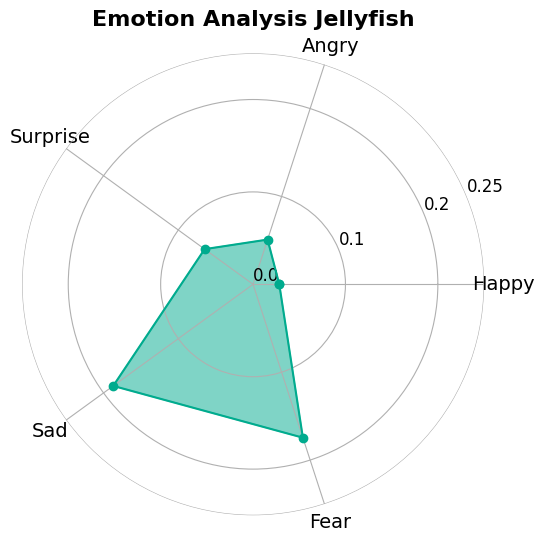

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import text2emotion as te

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/work/raw/userMessages.csv")

# Filter only the rows where "AI_type" is "treatment_beluga"
df = df[df["AI_value"] == "treatment_jellyfish"]

# Function to compute additional emotion scores
def get_emotion_scores(text):
    return te.get_emotion(str(text))

# Apply the function to the "user_text" column
emotion_scores = df['user_text'].apply(get_emotion_scores).apply(pd.Series)

# Merge these scores back with the original DataFrame
df = pd.concat([df, emotion_scores], axis=1)

# Calculate the mean scores for each emotion
average_scores = df[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']].mean()

# Radar chart setup
labels = average_scores.index
values = average_scores.values
values = np.append(values, values[0])  # Close the chart

angles = np.linspace(0, 2 * np.pi, len(labels) + 1)

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

# Plot without black outline
ax.plot(angles, values, marker='o', color='#00AB8E')  # No line, just markers
ax.fill(angles, values, color='#00AB8E', alpha=0.5)  # Softer fill, no outline

# Set labels and ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticks([0, 0.1, 0.2, 0.25])  
ax.set_yticklabels(["0.0", "0.1", "0.2", "0.25"], fontsize=12)
ax.spines['polar'].set_visible(False)
ax.set_title("Emotion Analysis Jellyfish", fontsize=16, pad=20, fontweight='bold')


plt.show()

## SenticNet

/tmp/ipykernel_439/467670797.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  emotions_scores = df['user_text'].apply(get_senticnet_emotions).apply(pd.Series).fillna(0)
/tmp/ipykernel_439/467670797.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  emotions_scores = df['user_text'].apply(get_senticnet_emotions).apply(pd.Series).fillna(0)
/tmp/ipykernel_439/467670797.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  emotions_scores = df['user_text'].apply(get_senticnet_emotions).apply(pd.Series).fillna(0)
/tmp/ipykernel_439/467670797.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a f

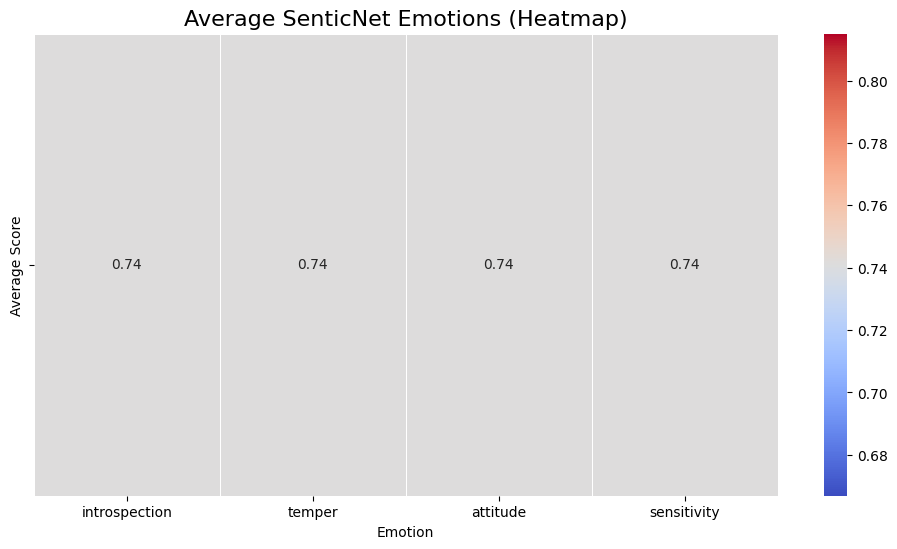

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from senticnet.senticnet import SenticNet

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/work/raw/userMessages.csv")

# Initialize SenticNet
sn = SenticNet()

# Function to compute SenticNet emotion scores
def get_senticnet_emotions(text):
    words = text.split()  # Simple word split
    emotions = {}
    count = 0
    for word in words:
        try:
            data = sn.concept(word.lower())
            for emotion in data['sentics']:
                emotions[emotion] = emotions.get(emotion, 0) + 1
            count += 1
        except KeyError:
            continue
    if count > 0:
        for key in emotions:
            emotions[key] /= count
    return emotions

# Apply the function to the "user_text" column
emotions_scores = df['user_text'].apply(get_senticnet_emotions).apply(pd.Series).fillna(0)

# Calculate the mean scores for each emotion
average_emotions = emotions_scores.mean()

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(average_emotions, columns=["Average Score"]).reset_index()
heatmap_data.columns = ["Emotion", "Average Score"]

# Pivot the DataFrame to a suitable format for heatmap
heatmap_pivot = heatmap_data.set_index("Emotion").transpose()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Average SenticNet Emotions (Heatmap)", size=16)
plt.xlabel("Emotion")
plt.ylabel("")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1013c793-54a5-4345-8056-59dcfc0f7c3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>